In [8]:
import mne
import requests

In [9]:
response = requests.get("https://archive.physionet.org/pn4/eegmmidb/S001/S001R01.edf")
open("S001R01.edf", "wb").write(response.content)
edf_raw = mne.io.read_raw_edf("S001R01.edf")

Extracting EDF parameters from /Users/abumbier/total_perspective_vortex/S001R01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


# Explore data

In [10]:
edf_raw.del_proj()

<RawEDF | S001R01.edf, 64 x 9760 (61.0 s), ~64 kB, data not loaded>

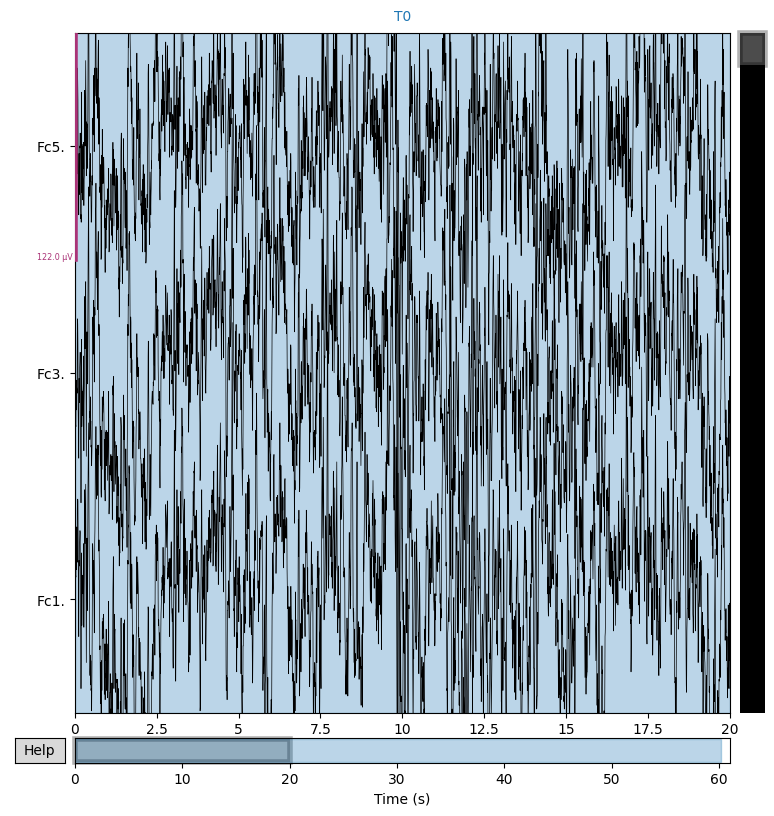

In [18]:
_ = edf_raw.plot(n_channels=3, scalings='auto', duration=20, remove_dc=False)

In [19]:
eeg_channels = mne.pick_types(edf_raw.info, eeg=True)

In [20]:
eeg_channels

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63])

In [14]:
edf_raw.load_data()

Reading 0 ... 9759  =      0.000 ...    60.994 secs...


<RawEDF | S001R01.edf, 64 x 9760 (61.0 s), ~4.8 MB, data loaded>

In [15]:
(events_from_annot,
 event_dict) = mne.events_from_annotations(edf_raw)

Used Annotations descriptions: ['T0']


In [17]:
event_dict

{'T0': 1}

In [35]:
mne.find_events(edf_raw, 'T0')

ValueError: No stim channel found to extract event triggers.

In [31]:
edf_raw.copy().pick_types(eeg=True, stim=True)

<RawEDF | S001R01.edf, 64 x 9760 (61.0 s), ~4.8 MB, data loaded>

In [33]:
edf_raw.annotations

<Annotations | 1 segment: T0 (1)>

In [36]:
events_from_annot

array([[0, 0, 1]])